# Imports

In [15]:
source("ggplot3.R")
library(ggraph)
library(tidygraph)

In [11]:
figsize()

In [14]:
as_tbl_graph(highschool)

# A tbl_graph: 70 nodes and 506 edges
#
# A directed multigraph with 1 component
#
# A tibble: 70 × 1
  name 
  <chr>
1 1    
2 2    
3 3    
4 4    
5 5    
6 6    
# ℹ 64 more rows
#
# A tibble: 506 × 3
   from    to  year
  <int> <int> <dbl>
1     1    13  1957
2     1    14  1957
3     1    20  1957
# ℹ 503 more rows

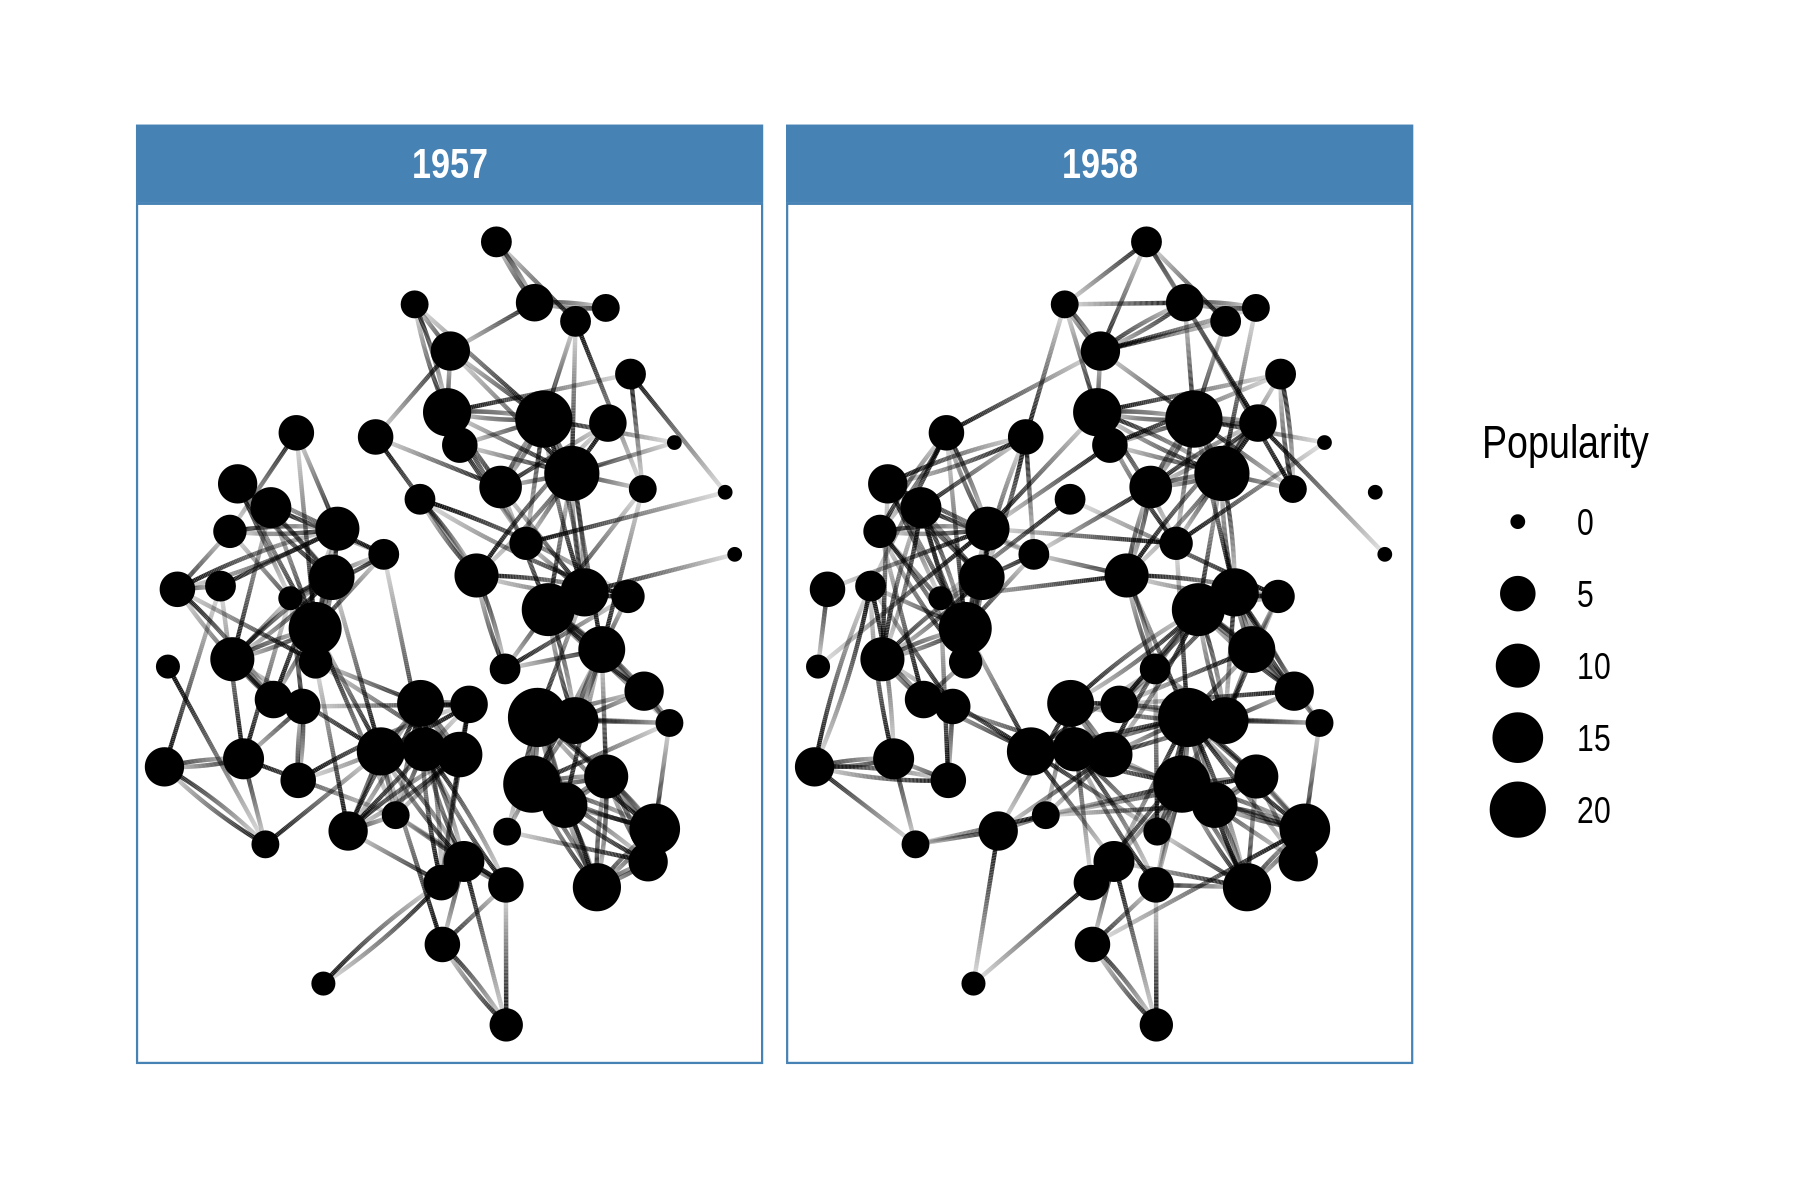

In [12]:


# Create graph of highschool friendships
graph <- as_tbl_graph(highschool) %>% 
    mutate(Popularity = centrality_degree(mode = 'in'))

# plot using ggraph
ggraph(graph, layout = 'kk') + 
    geom_edge_fan(aes(alpha = after_stat(index)), show.legend = FALSE) + 
    geom_node_point(aes(size = Popularity)) + 
    facet_edges(~year) + 
    theme_graph(foreground = 'steelblue', fg_text_colour = 'white')